In [50]:
import pandas as pd

# Machine Learning Libraries

Machine learning consists of letting a computer find a way to solve a problem using data. In contrast, with traditional programming, the programmer defines, in code, the way to find a solution, rather than the solution itself. This chapter provides a brief overview of some of the popular libraries used for machine learning. These libraries implement the algorithms used to create and train machine learning models. These models have various uses, depending on the type of problem. For example, some models are useful for predicting future values, and others are useful for classifying data into groups or categories.

## Popular Machine Learning Libraries

Four of the most popular machine learning libraries are TensorFlow, Keras, PyTorch, and Scikit-learn:

- **TensorFlow**: Google developed this powerful library for internal use. It is used to solve problems using deep learning. This involves defining layers that transform the data and that are tuned as the solution is fit to data.
- **Keras**: This open-source library was designed to work with TensorFlow, and it is now included in the TensorFlow library (see https://www.tensorflow.org/guide).
- **PyTorch**: This is Facebook’s contribution to production-worthy machine learning libraries. It is based on the Torch library, which makes use of GPUs in solving deep learning problems (see https://pytorch.org/docs/stable/index.html).
- **Scikit-learn**: This popular library for starting machine learning is built on top of NumPy and SciPy. It has classes for most of the traditional algorithms. You will learn more about Scikit-learn in the next section.


## How Machine Learning Works

Machine learning algorithms can be divided into two types: unsupervised and supervised learning. *Unsupervised learning* involves discovering insights about data without preexisting results to test against. This generally means identifying patterns based on the data’s characteristics without any input from a data scientist. *Supervised learning* involves using known data to train and test a model. 

Generally, the steps to training a supervised model are as follows:

1. Transform data.
2. Separate out test data.
3. Train the model.
4. Test model performance.

Scikit-learn has tools to simplify each of these steps, as discussed in the following sections.

### Transformations

For some algorithms, it is advantageous to transform the data before training a model. For example, you might want to turn a continuous variable, such as age, into discrete categories, such as age ranges. Scikit-learn includes many types of transformers, including transformers for cleaning, feature extraction, reduction, and expansion. These are represented as classes, which generally use a `.fit()` method to determine the transformation and a `.transform()` method to modify data using the transformation. The next listing uses the `MinMaxScaler` transformer, which scales values to fit in a defined range—between 0 and 1 by default.

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = np.array([[100, 34, 4], 
                 [90,  2,  0],
                 [78, -12, 16],
                 [23,  45, 4]]) # Array with data range -12 to 100

data

array([[100,  34,   4],
       [ 90,   2,   0],
       [ 78, -12,  16],
       [ 23,  45,   4]])

In [12]:
data.std(axis=0)

array([29.76050235, 23.12331075,  6.        ])

In [2]:
minMax = MinMaxScaler()          # Create a transformer object 
scaler = minMax.fit(data)        # Fit the transformer to the data 

scaler.transform(data)           # Scale to range between 0 and 1

array([[1.        , 0.80701754, 0.25      ],
       [0.87012987, 0.24561404, 0.        ],
       [0.71428571, 0.        , 1.        ],
       [0.        , 1.        , 0.25      ]])

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(data)

array([[ 0.91564315,  0.72437724, -0.33333333],
       [ 0.57962731, -0.65950764, -1.        ],
       [ 0.17640831, -1.26495727,  1.66666667],
       [-1.67167877,  1.20008766, -0.33333333]])

In [10]:
scaler.transform(data).std(axis=0)

array([1., 1., 1.])

There may be times when you want to separate your data before fitting the transformer. When you do this, the transformer settings will not be affected by the test data. Fitting and transforming require separate methods; it is easy to fit to the train data and use that to transform the test data.

###  Splitting Test and Training Data

One important pitfall to avoid when training a model is *overfitting*, which occurs when a model perfectly predicts the data used to train it but has little predictive power with new data. In the simplest sense, you avoid overfitting by not testing the model with the data with which it was trained. Scikit-learn offers helper methods to make splitting data easy.

Before looking at an example of splitting data, you can load a simple example. Like a number of other data science libraries, Scikit-learn comes with some sample data sets. The next listing loads the iris data set. Notice that the `.load_iris()` functions loads two NumPy arrays of data: The first is the *source data* (the characteristics that will be used to make predictions), and the second is the *target characteristic* to predict. In the case of the iris data set, the source data has 150 samples of 4 characteristics and 150 targets that represent the types of iris.

In [5]:
from sklearn import datasets # Load the sample data sets 

source, target = datasets.load_iris(return_X_y=True) # Load source and targets 

print(type(source))
source

<class 'numpy.ndarray'>


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
X = source
y = target

In [57]:
from sklearn import datasets # Load the sample data sets 

data = datasets.load_iris(as_frame=True)["frame"] # Load source and targets 

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [58]:
# Spaß
data.iloc[:, 0] = data.iloc[:,0] * 1000

In [59]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5100.0,3.5,1.4,0.2,0
1,4900.0,3.0,1.4,0.2,0
2,4700.0,3.2,1.3,0.2,0
3,4600.0,3.1,1.5,0.2,0
4,5000.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6700.0,3.0,5.2,2.3,2
146,6300.0,2.5,5.0,1.9,2
147,6500.0,3.0,5.2,2.0,2
148,6200.0,3.4,5.4,2.3,2


In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data.drop(columns=["target"]))
data_transform = scaler.transform(data.drop(columns=["target"]))

In [72]:
X = data_transform
y = data.target

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

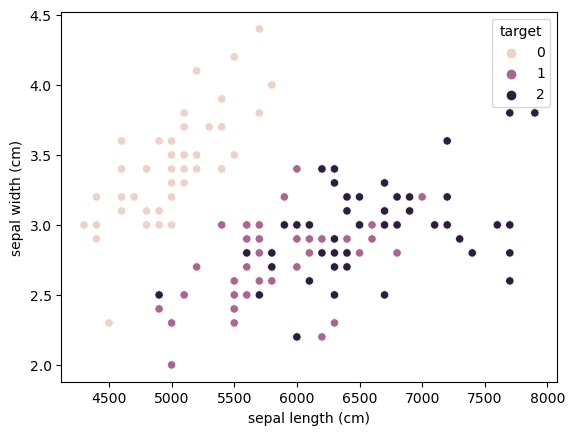

In [76]:
import seaborn as sns

sns.scatterplot(data=data, x="sepal length (cm)", y="sepal width (cm)", hue="target")

In [6]:
print(type(target))
target

<class 'numpy.ndarray'>


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
source.shape, target.shape

((150, 4), (150,))

**Splitting a Data Set**

The next listing uses the Scikit-learn function `train_test_split()` to split the iris data set provided with the library into training and test data sets. You can see that the samples are split so that 112 of them are in the training set, and 38 of them are in the test set.

In [16]:
from sklearn.model_selection import train_test_split

?train_test_split

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train

In [41]:
train_data, test_data = train_test_split(data, train_size=0.75)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [21]:
train_data.shape, test_data.shape

((112, 5), (38, 5))

In [23]:
train_data.shape[0] + test_data.shape[0] == data.shape[0]

True

In [43]:
target_col = "target"
X_train = train_data.drop(columns=[target_col])
y_train = train_data[target_col]
X_test = test_data.drop(columns=[target_col])
y_test = test_data[target_col]

In [44]:
X_train, y_train

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 52              6900.0               3.1                4.9               1.5
 14              5800.0               4.0                1.2               0.2
 94              5600.0               2.7                4.2               1.3
 33              5500.0               4.2                1.4               0.2
 31              5400.0               3.4                1.5               0.4
 ..                 ...               ...                ...               ...
 40              5000.0               3.5                1.3               0.3
 23              5100.0               3.3                1.7               0.5
 123             6300.0               2.7                4.9               1.8
 91              6100.0               3.0                4.6               1.4
 114             5800.0               2.8                5.1               2.4
 
 [112 rows x 4 columns],
 52     1
 14     0
 94  

### Training and Testing

Scikit-learn offers many classes representing various machine learning algorithms. These classes are referred to as *estimators*. Many estimators can be tuned using parameters during instantiation. Each estimator has a `.fit()` method, which trains the model. Most of the `.fit()` methods take two arguments. The first is some sort of training data, referred to as *samples*. The second is the results, or targets, for those samples. Both arguments should be array-like objects, such as NumPy arrays. When the training is done, the model can predict results by using its `.predict()` method. The accuracy of this prediction can be checked using functions from the method’s module.

**Training a Model**

The next listing shows a simple example using the `KNeighborsClassifier` estimator. *K-nearest neighbors* is an algorithm that groups samples based on the distance between characteristics. It makes predictions by comparing a new sample to the existing samples that are its closest neighbors. You can *tune* the algorithm by choosing how many neighbors are compared to the new sample. When the model is trained, you can make predictions using the test data and check the accuracy of those predictions.

In [88]:
from sklearn.neighbors import KNeighborsClassifier   # Import estimator class 
from sklearn import metrics   # Import the metrics module to test accuracy 

knn = KNeighborsClassifier(n_neighbors=3)   # Create 3-neighbor estimator
knn.fit(X_train, y_train)   # Train the model using the training data

KNeighborsClassifier(n_neighbors=3)

In [91]:
# alternatives Modell
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
knn.score(X_train, y_train)

/Users/miay/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [94]:
knn.score(X_test, y_test)

/Users/miay/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.868421052631579

In [92]:
tree.score(X_train, y_train)

1.0

In [93]:
tree.score(X_test, y_test)

0.8947368421052632

In [32]:
test_prediction = knn.predict(X_test)   # Make predictions from source data
test_prediction

/Users/miay/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0,
       1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0])

In [33]:
metrics.accuracy_score(y_test, test_prediction)   # Accuracy against test data 

1.0

In [ ]:
# model speichern und laden

In [95]:
import pickle

with open("mymodel.pkl", "wb") as file:
    pickle.dump(tree, file)

In [96]:
with open("mymodel.pkl", "rb") as file:
    tree = pickle.load(file)

In [98]:
tree.predict(X_test)

array([1, 1, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 2, 1, 1, 2, 0,
       1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 2])

## Learning More About Scikit-learn

This chapter only scratches the surface of Scikit-learn’s capabilities. Other important features include tools for cross-validation, where a data set is split multiple times to avoid overfitting on test data, and pipelines, which wrap up transformers, estimators, and cross-validation together. If you want to learn more about Scikit-learn, you can find great tutorials at https://scikit-learn.org/stable/.


## Summary

Many of the algorithms used to create machine learning models are represented in the major Python machine learning libraries. TensorFlow is a deep learning library created by Google. PyTorch is a library built on Torch by Facebook. Scikit-learn is a popular library for getting started with machine learning. It has modules and functions to perform the steps involved in creating and analyzing a model.
Questions

1. In which step of training a supervised estimator would a Scikit-learn transformer be useful?
2. Why is it important to separate training data and test data in machine learning?
3. After you have transformed your data and trained your model, what should you do next?